# Lending Club Data Analysis

This notebook includes sample code that addresses requirements 1 through 9.

## Requirment 1. Understanding Lending Club Operations

- **Research and describe** how Lending Club operates, including the processes for both borrowers and investors.
- **Outline** the different types of loans available, their terms, interest rates, and associated fees.

## Requirement 2. Exploring the Lending Club Loan Dataset through Descriptive Statistics and Visualizations

- **Describe the Dataset:** Provide an overview and detailed explanations for each column in the dataset.
- **Generate Descriptive Statistics:** Compute and present basic statistical metrics to understand the dataset's characteristics.
- **Create Visualizations:** Develop visual representations to explore data characteristics and relationships between features.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#display all dataframe columns in df.head()
pd.options.display.max_columns = None

#display long string in datafame
pd.options.display.max_colwidth = 300

#filter out warning messages
import warnings
warnings.filterwarnings('ignore')

sns.set()

In [2]:
loan_df = pd.read_csv('lending_club_loan_data.csv')
loan_df.head()

,loan_amnt,loan_term_year,grade,int_rate,purpose,annual_inc,emp_length,verification_status,home_ownership,addr_state,dti,total_acc,total_pymnt,recoveries,collection_recovery_fee,loan_status,repaid,annual_return
0,2400,3,C,15.96,small_business,12252.0,10+ years,Not Verified,RENT,IL,8.72,10.0,3005.666844,0.00,0.00,Fully Paid,1,0.232450
1,10000,3,C,13.49,other,49200.0,10+ years,Source Verified,RENT,CA,20.00,37.0,12231.890000,0.00,0.00,Fully Paid,1,0.211337
2,3000,3,E,18.64,car,48000.0,9 years,Source Verified,RENT,CA,5.35,4.0,3939.135294,0.00,0.00,Fully Paid,1,0.273831
3,5600,5,F,21.28,small_business,40000.0,4 years,Source Verified,OWN,CA,5.55,13.0,647.500000,190.54,2.09,Charged Off,0,-0.999988
4,5375,5,B,12.69,other,15000.0,< 1 year,Verified,RENT,TX,18.08,3.0,1484.590000,277.69,2.52,Charged Off,0,-0.888376


In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19908 entries, 0 to 19907
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                19908 non-null  int64  
 1   loan_term_year           19908 non-null  int64  
 2   grade                    19908 non-null  object 
 3   int_rate                 19908 non-null  float64
 4   purpose                  19908 non-null  object 
 5   annual_inc               19908 non-null  float64
 6   emp_length               19908 non-null  object 
 7   verification_status      19908 non-null  object 
 8   home_ownership           19908 non-null  object 
 9   addr_state               19908 non-null  object 
 10  dti                      19908 non-null  float64
 11  total_acc                19908 non-null  float64
 12  total_pymnt              19908 non-null  float64
 13  recoveries               19908 non-null  float64
 14  collection_recovery_fe

In [4]:
data_dictionary = pd.read_csv('lending_club_data_dictionary.csv')
data_dictionary

,Column Name,Description
0,addr_state,The state provided by the borrower in the loan application.
1,annual_inc,The self-reported annual income provided by the borrower during registration.
2,collection_recovery_fee,Post charge off collection fee.
3,dti,"A ratio calculated using the borrower's total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower's self-reported monthly income."
4,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
5,grade,LC assigned loan grade.
6,home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Possible values are: RENT, OWN, MORTGAGE, OTHER."
7,int_rate,Interest Rate on the loan.
8,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
9,loan_status,Current status of the loan


In [5]:
loan_df.describe()

,loan_amnt,loan_term_year,int_rate,annual_inc,dti,total_acc,total_pymnt,recoveries,collection_recovery_fee,repaid,annual_return
count,19908.000000,19908.000000,19908.000000,1.990800e+04,19908.000000,19908.000000,19908.000000,19908.000000,19908.000000,19908.00000,19908.000000
mean,11353.846444,3.507937,12.089717,7.107345e+04,13.008619,21.527627,12286.852391,94.722382,11.861625,0.85217,0.071528
std,7463.700492,0.870581,3.698287,6.980565e+04,6.663658,11.269006,9098.847567,666.434583,141.910324,0.35494,0.284831
min,500.000000,3.000000,5.420000,4.000000e+03,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,-1.000000
25%,5750.000000,3.000000,9.450000,4.200000e+04,7.840000,13.000000,5670.592545,0.000000,0.000000,1.00000,0.109808
50%,10000.000000,3.000000,11.860000,6.000000e+04,13.075000,20.000000,10042.735817,0.000000,0.000000,1.00000,0.155620
75%,15000.000000,5.000000,14.610000,8.500000e+04,18.200000,28.000000,16681.688450,0.000000,0.000000,1.00000,0.197859
max,35000.000000,5.000000,24.400000,6.000000e+06,29.990000,90.000000,58480.139915,29623.350000,6543.040000,1.00000,0.650391


#### Loan Grade
How many different loan grades are there in the dataset? What's the distribution?

- Plot a bar chart for grade. The x axis is the loan grade and the y axis is the count of loans. The plot should have x and y axis labels and a proper title.
- Briefly discuss the results.

Hint: You may use seaborn countplot. To sort the loan grade you may set `order=sorted(loan_df.grade.unique())` in the countplot.

In [6]:
loan_df.grade.value_counts()

grade
B    6065
A    4875
C    4087
D    2748
E    1434
F     540
G     159
Name: count, dtype: int64

Text(0.5, 1.0, 'Loan Grade Distribution')

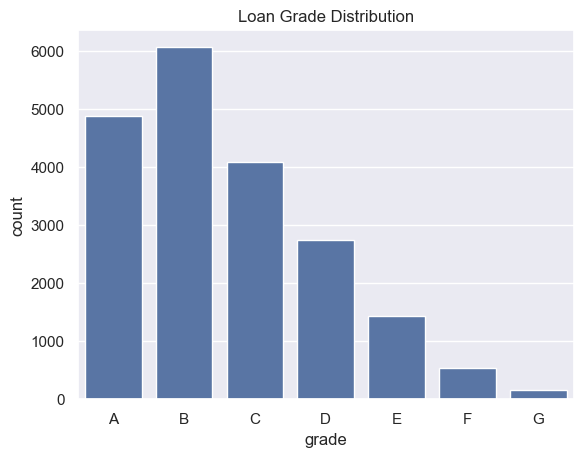

In [7]:
ax = sns.countplot(data=loan_df, x='grade', order=sorted(loan_df.grade.unique()))
ax.set_title('Loan Grade Distribution')

#### Loan Term
How many different loan terms?

- Plot a bar chart for term. The x axis is the loan_term_year and the y axis is the count of loans. The plot should have x and y axis labels and a proper title.
- Briefly discuss the results

In [8]:
loan_df.loan_term_year.value_counts()

loan_term_year
3    14852
5     5056
Name: count, dtype: int64

Text(0.5, 1.0, 'Loan Term Distribution')

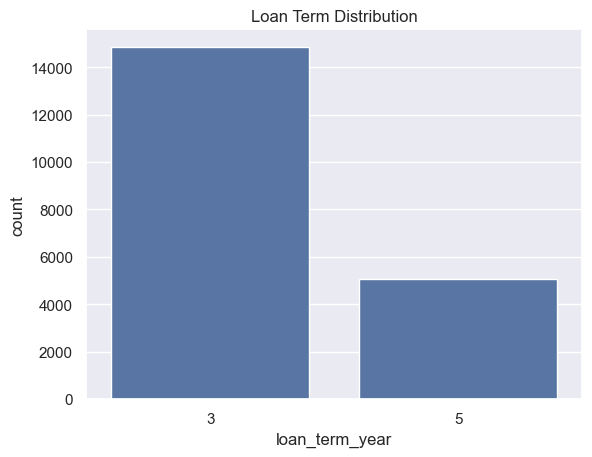

In [9]:
ax = sns.countplot(data=loan_df, x='loan_term_year')
ax.set_title('Loan Term Distribution')

#### Interest Rate

Display distribution of interest rate.

- Plot a histogram on int_rate. The plot should have x and y axis labels and a proper title.
- Briefly discuss the results

Text(0.5, 1.0, 'Interest Rate Distribution')

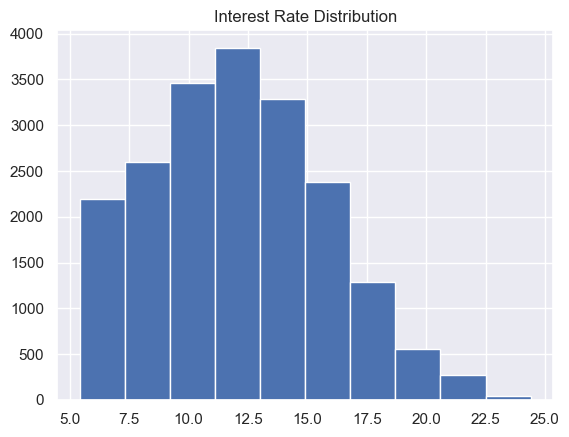

In [10]:
ax = loan_df.int_rate.hist()
ax.set_title('Interest Rate Distribution')

#### Loan Amount

Display distribution of loan amount.

- Plot a histogram on loan_amnt. The plot should have x and y axis labels and a proper title.
- Briefly discuss the results

Text(0.5, 1.0, 'Loan Amount Distribution')

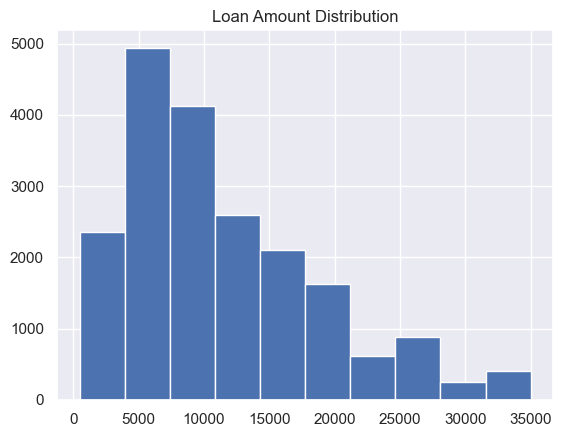

In [11]:
ax = loan_df.loan_amnt.hist()
ax.set_title('Loan Amount Distribution')

#### Loan Grade and Interest Rate

Explore the relationship between loan grade and interest rate.

- Get average interest rate for each loan grade.
 - Group by grade column.
 - Apply aggregate function mean on int_rate column.
- Visualize the average interest rate of each loan grade with a bar chart. Make sure the plot has proper labels and title.
- Briefly discuss the relationship.

**Hint**: You can directly plot a bar chart on an aggregated groupby object. ie. `ax = df.groupby(...).agg(...).plot.bar()`

In [12]:
loan_df.groupby(by='grade').agg({'int_rate':'mean'})

,int_rate
grade,
A,7.350978
B,11.033439
C,13.555241
D,15.707576
E,17.653752
F,19.729463
G,21.346981


Text(0.5, 1.0, 'Loan Grade and Interest Rate')

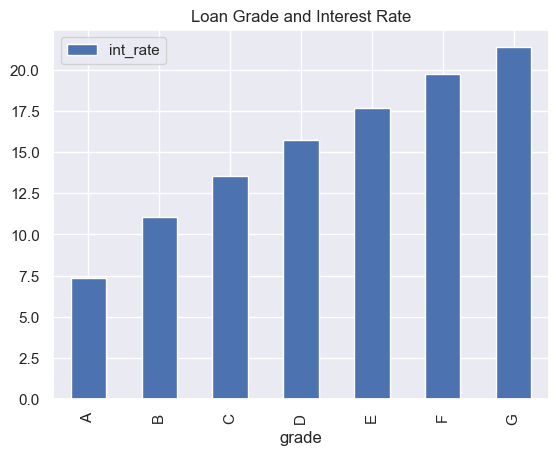

In [13]:
ax = loan_df.groupby(by='grade').agg({'int_rate':'mean'}).plot.bar()
ax.set_title('Loan Grade and Interest Rate')

#### Loan Term and Interest Rate

Explore the relationship between loan term and interest rate.

- Get average interest rate for each loan term.
 - Group by term column.
 - Apply aggregate function mean on int_rate column.
- Visualize the average interest rate of each term with a bar chart. Make sure the plot has proper labels and title.
- Briefly discuss the relationship.

**Hint**: You can directly plot a bar chart on an aggregated groupby object. ie. `ax = df.groupby(...).agg(...).plot.bar()`

In [14]:
loan_df.groupby(by='loan_term_year').agg({'int_rate':'mean'})

,int_rate
loan_term_year,
3,11.121125
5,14.934955


Text(0.5, 1.0, 'Loan Term and Interest Rate')

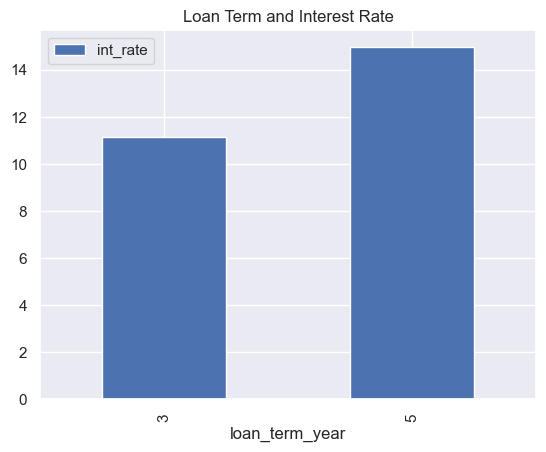

In [15]:
ax = loan_df.groupby(by='loan_term_year').agg({'int_rate':'mean'}).plot.bar()
ax.set_title('Loan Term and Interest Rate')

#### Payoff Rate

Find overal payoff rate.

In [16]:
loan_df.repaid.mean()

0.8521699819168174

#### Payoff Rate by Grade

Explore the payoff rate of each loan grade.

- Get average repaid for each loan grade.
 - Group by grade column.
 - Apply aggregate function mean on repaid column.
- Visualize the average payoff rate of each loan grade with a bar chart. Make sure the plot has proper labels and title.
- Briefly discuss the relationship.

**Hint**: You can directly plot a bar chart on an aggregated groupby object. ie. `ax = df.groupby(...).agg(...).plot.bar()`

In [17]:
loan_df.groupby(by='grade').agg({'repaid':'mean'})

,repaid
grade,
A,0.937641
B,0.871558
C,0.835576
D,0.789301
E,0.736402
F,0.677778
G,0.641509


Text(0.5, 1.0, 'Payoff Rate by Loan Grade')

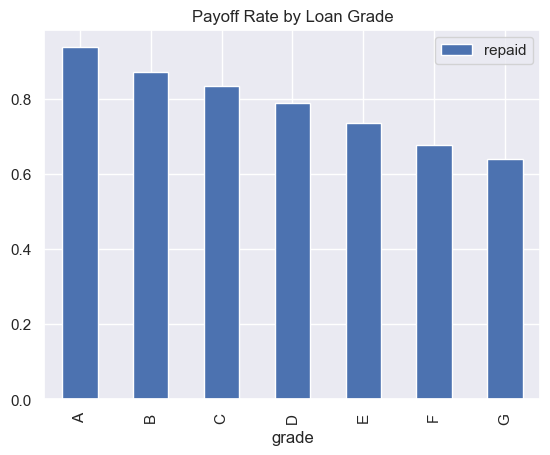

In [18]:
ax = loan_df.groupby(by='grade').agg({'repaid':'mean'}).plot.bar()
ax.set_title('Payoff Rate by Loan Grade')

#### Interest Rate by Grade

In [19]:
loan_df.groupby(by='grade').agg({'int_rate':'mean'})

,int_rate
grade,
A,7.350978
B,11.033439
C,13.555241
D,15.707576
E,17.653752
F,19.729463
G,21.346981


Text(0.5, 1.0, 'Interest Rate by Loan Grade')

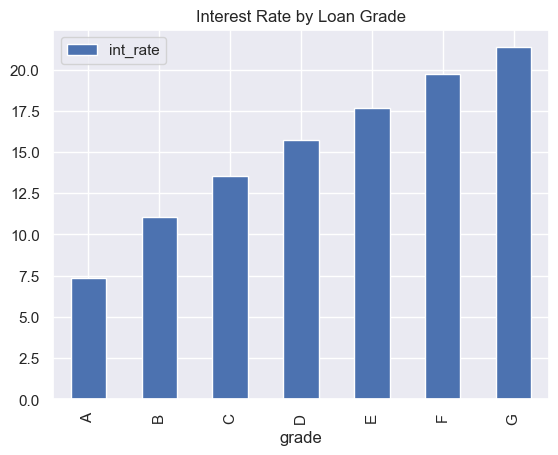

In [20]:
ax = loan_df.groupby(by='grade').agg({'int_rate':'mean'}).plot.bar()
ax.set_title('Interest Rate by Loan Grade')

#### Payoff Rate by Loan Term

Explore the payoff rate of each loan term.

- Get average repaid for each loan term.
 - Group by loan_term_year column.
 - Apply aggregate function mean on repaid column.
- Visualize the average payoff rate of each loan grade with a bar chart. Make sure the plot has proper labels and title.
- Briefly discuss the relationship.

**Hint**: You can directly plot a bar chart on an aggregated groupby object. ie. `ax = df.groupby(...).agg(...).plot.bar()`

In [21]:
loan_df.groupby(by='loan_term_year').agg({'repaid':'mean'})

,repaid
loan_term_year,
3,0.883652
5,0.759691


Text(0.5, 1.0, 'Payoff Rate by Loan Term')

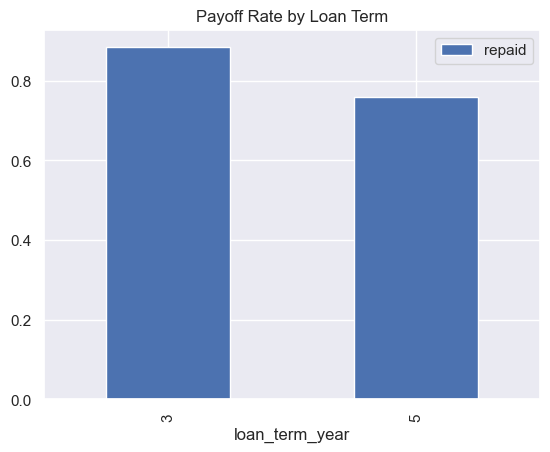

In [22]:
ax = loan_df.groupby(by='loan_term_year').agg({'repaid':'mean'}).plot.bar()
ax.set_title('Payoff Rate by Loan Term')

#### Borrowers Annual Income Distribution

- Plot a histogram of all borrower's annual income.
- Plot another histogram of annual income that is less than $250,000.
- Compare the plots and discuss briefly.

**Hint**: You may use hist() function on annual_inc column to plot histogram.

Text(0.5, 1.0, 'Annual Income Distribution')

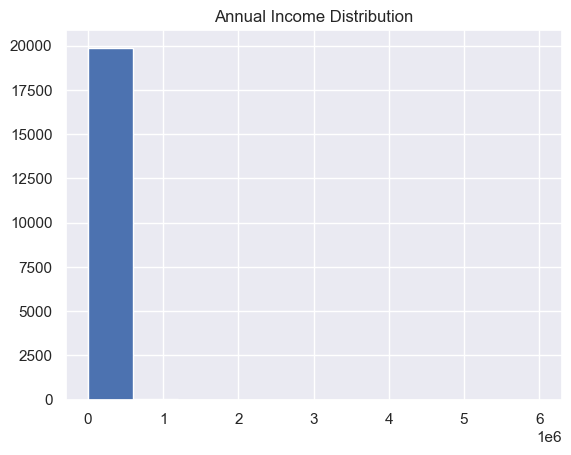

In [23]:
ax = loan_df.annual_inc.hist()
ax.set_title('Annual Income Distribution')

Text(0.5, 1.0, 'Annual Income Distribution Below $250,000')

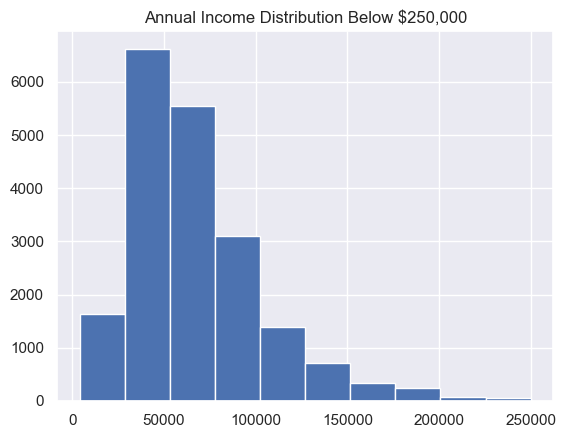

In [24]:
ax = loan_df[loan_df.annual_inc<250000].annual_inc.hist()
ax.set_title('Annual Income Distribution Below $250,000')

#### Loan Purpose
How many different loan purpose are there in the dataset? What's the distribution?

- Plot a horizontal bar chart for purpose. The y axis is the loan purpose and the y axis is the count of loans. The plot should have x and y axis labels and a proper title.
- Briefly discuss the results.

Hint: You may use seaborn countplot. To sort the loan purpose by number of loans you may set `order=loan_df.purpose.value_counts().index` in the countplot.

Text(0.5, 1.0, 'Loan Grade Distribution')

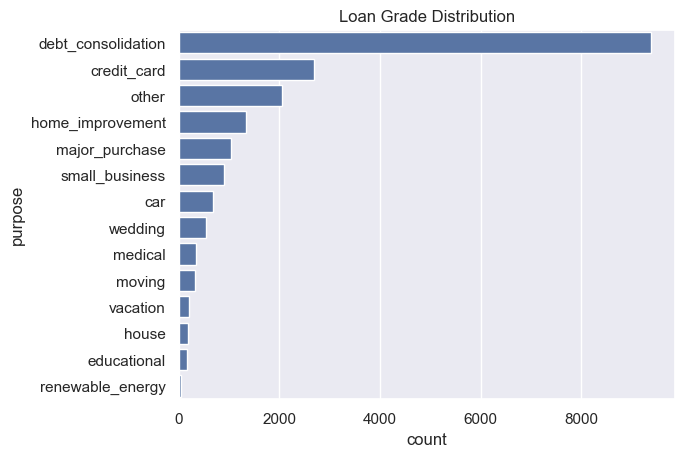

In [25]:
ax = sns.countplot(data=loan_df, y='purpose', order=loan_df.purpose.value_counts().index)
ax.set_title('Loan Grade Distribution')

#### Payoff Rate by Purpose

Explore the payoff rate of each loan purpose.

- Get average repaid for each loan purpose.
- Sort by average payoff rate.


In [26]:
loan_df.groupby(by='purpose').agg({'repaid':'mean'}).sort_values(by='repaid')

,repaid
purpose,
small_business,0.728177
educational,0.801242
house,0.823864
moving,0.829653
other,0.843689
debt_consolidation,0.845670
medical,0.854286
vacation,0.859296
renewable_energy,0.862745


Text(0.5, 1.0, 'Payoff Rate by Loan Purpose')

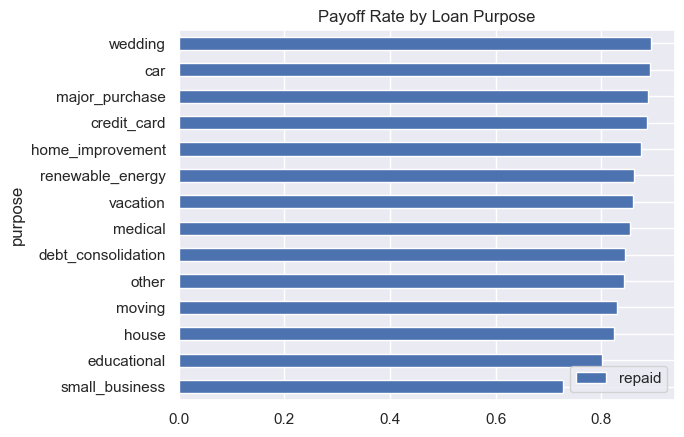

In [27]:
ax = loan_df.groupby(by='purpose').agg({'repaid':'mean'}).sort_values(by='repaid').plot.barh()
ax.set_title('Payoff Rate by Loan Purpose')

#### total_acc

<Axes: >

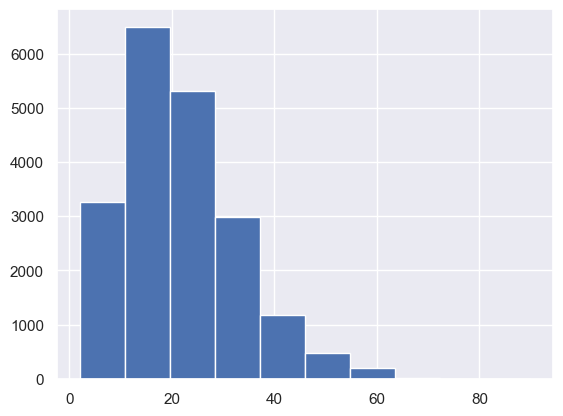

In [28]:
loan_df.total_acc.hist()

## Requirment 3. Feature Selection for Logistic Regression
- **Identify and select features** for training a logistic regression model.
- **Exclude features** that are only available after loan origination.


In [29]:
loan_df.describe()

,loan_amnt,loan_term_year,int_rate,annual_inc,dti,total_acc,total_pymnt,recoveries,collection_recovery_fee,repaid,annual_return
count,19908.000000,19908.000000,19908.000000,1.990800e+04,19908.000000,19908.000000,19908.000000,19908.000000,19908.000000,19908.00000,19908.000000
mean,11353.846444,3.507937,12.089717,7.107345e+04,13.008619,21.527627,12286.852391,94.722382,11.861625,0.85217,0.071528
std,7463.700492,0.870581,3.698287,6.980565e+04,6.663658,11.269006,9098.847567,666.434583,141.910324,0.35494,0.284831
min,500.000000,3.000000,5.420000,4.000000e+03,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,-1.000000
25%,5750.000000,3.000000,9.450000,4.200000e+04,7.840000,13.000000,5670.592545,0.000000,0.000000,1.00000,0.109808
50%,10000.000000,3.000000,11.860000,6.000000e+04,13.075000,20.000000,10042.735817,0.000000,0.000000,1.00000,0.155620
75%,15000.000000,5.000000,14.610000,8.500000e+04,18.200000,28.000000,16681.688450,0.000000,0.000000,1.00000,0.197859
max,35000.000000,5.000000,24.400000,6.000000e+06,29.990000,90.000000,58480.139915,29623.350000,6543.040000,1.00000,0.650391


In [30]:
loan_df.columns

Index(['loan_amnt', 'loan_term_year', 'grade', 'int_rate', 'purpose',
       'annual_inc', 'emp_length', 'verification_status', 'home_ownership',
       'addr_state', 'dti', 'total_acc', 'total_pymnt', 'recoveries',
       'collection_recovery_fee', 'loan_status', 'repaid', 'annual_return'],
      dtype='object')

In [31]:
training_features = ['loan_amnt', 'loan_term_year', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose',
       'addr_state', 'dti', 'total_acc']
df = loan_df[training_features]
#df.drop(columns=['delinq_2yrs', 'inq_last_6mths','mths_since_last_delinq', 'mths_since_last_record'], inplace=True)
#df.drop(columns=['int_rate'], inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19908 entries, 0 to 19907
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            19908 non-null  int64  
 1   loan_term_year       19908 non-null  int64  
 2   int_rate             19908 non-null  float64
 3   grade                19908 non-null  object 
 4   emp_length           19908 non-null  object 
 5   home_ownership       19908 non-null  object 
 6   annual_inc           19908 non-null  float64
 7   verification_status  19908 non-null  object 
 8   purpose              19908 non-null  object 
 9   addr_state           19908 non-null  object 
 10  dti                  19908 non-null  float64
 11  total_acc            19908 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 1.8+ MB


## Requiremnt 4. Encoding Categorical Features
- **Encode categorical variables** appropriately using one-hot encoding or label encoding techniques.


In [33]:
df_with_dummies = pd.get_dummies(df, columns=['grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'addr_state' ], drop_first=True)
#df_with_dummies = pd.get_dummies(df, columns=['emp_length', 'home_ownership', 'verification_status', 'purpose', 'addr_state' ], drop_first=True)
df_with_dummies.head()

,loan_amnt,loan_term_year,int_rate,annual_inc,dti,total_acc,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_FL,addr_state_IL,addr_state_NJ,addr_state_NY,addr_state_TX
0,2400,3,15.96,12252.0,8.72,10.0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
1,10000,3,13.49,49200.0,20.00,37.0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,3000,3,18.64,48000.0,5.35,4.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,5600,5,21.28,40000.0,5.55,13.0,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,5375,5,12.69,15000.0,18.08,3.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True


## Requirment 5. Training the Logistic Regression Model
- **Split the dataset** into training and testing sets.
- **Train a logistic regression model** using the selected features.
- **Evaluate the model's performance** using appropriate metrics.
- **Compare the model performance with zero-model performance**
- **Understand type 1&2 errors and their trade-off**


In [34]:
# This method produces a colored heatmap for the confusion matrix.
def confusion_matrix(test, predict, labels, title='Confusion Matrix'):
    '''
        test: true label of test data, must be one dimensional
        predict: predicted label of test data, must be one dimensional
        labels: list of label names, ie: ['positive', 'negative']
        title: plot title
    '''

    bins = len(labels)
    # Make a 2D histogram from the test and result arrays
    pts, xe, ye = np.histogram2d(test, predict, bins)

    # For simplicity we create a new DataFrame
    pd_pts = pd.DataFrame(pts.astype(int), index=labels, columns=labels )
    
    # Display heatmap and add decorations
    hm = sns.heatmap(pd_pts, annot=True, fmt="d", cmap='Blues')
    hm.axes.set_title(title, fontsize=20)
    hm.axes.set_xlabel('Predicted', fontsize=18)
    hm.axes.set_ylabel('Actual', fontsize=18)

    return None

In [35]:
from sklearn.model_selection import train_test_split
data = df_with_dummies
label = loan_df.repaid
d_train, d_test, l_train, l_test = train_test_split(data, label, test_size=0.3, random_state=23)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(d_train, l_train)

# Predict on the test set
l_pred = model.predict(d_test)

# Evaluate the model
accuracy = accuracy_score(l_test, l_pred)
print(accuracy)
class_report = classification_report(l_test, l_pred)
print(class_report)

0.8499916289971539
              precision    recall  f1-score   support

           0       0.40      0.00      0.01       894
           1       0.85      1.00      0.92      5079

    accuracy                           0.85      5973
   macro avg       0.63      0.50      0.46      5973
weighted avg       0.78      0.85      0.78      5973



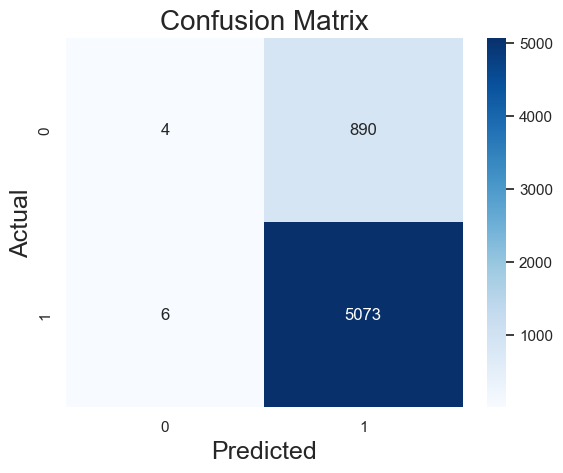

In [37]:
confusion_matrix(l_test, l_pred, [0, 1])

In [38]:
# Zero model
l_test.mean()

0.8503264691109995

## Requirment 6. Improving Model
- **Tune the model hyperparameter** to reduce certain type of error.
- **Re-train the model** with the optimized hyperparameters.

In [39]:
model = LogisticRegression(class_weight='balanced')
model.fit(d_train, l_train)

# Predict on the test set
l_pred = model.predict(d_test)

# Evaluate the model
accuracy = accuracy_score(l_test, l_pred)
print(accuracy)
class_report = classification_report(l_test, l_pred)
print(class_report)

0.5102963335007534
              precision    recall  f1-score   support

           0       0.19      0.73      0.31       894
           1       0.91      0.47      0.62      5079

    accuracy                           0.51      5973
   macro avg       0.55      0.60      0.46      5973
weighted avg       0.80      0.51      0.57      5973



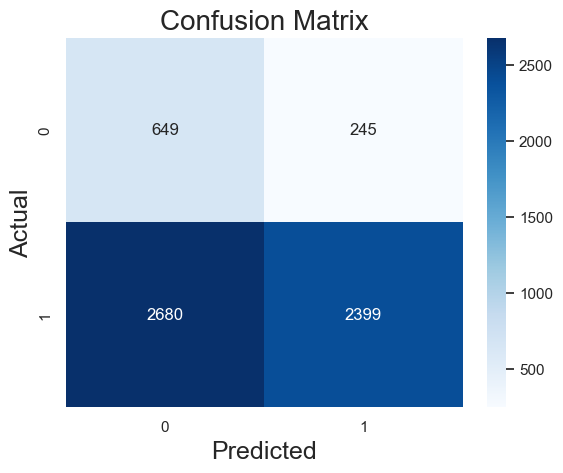

In [40]:
confusion_matrix(l_test, l_pred, [0, 1])

In [41]:
model = LogisticRegression(class_weight={0:0.9, 1:0.1})
model.fit(d_train, l_train)

# Predict on the test set
l_pred = model.predict(d_test)

# Evaluate the model
accuracy = accuracy_score(l_test, l_pred)
print(accuracy)
class_report = classification_report(l_test, l_pred)
print(class_report)

0.41235560020090406
              precision    recall  f1-score   support

           0       0.18      0.85      0.30       894
           1       0.93      0.34      0.49      5079

    accuracy                           0.41      5973
   macro avg       0.55      0.59      0.40      5973
weighted avg       0.81      0.41      0.46      5973



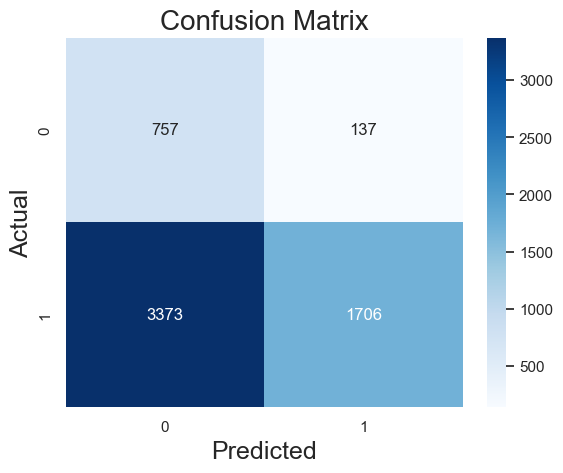

In [42]:
confusion_matrix(l_test, l_pred, [0, 1])

## Requirement 7. Making Predictions and Constructing a Portfolio
- **Use the trained model** to make predictions on the test set.
- **Construct a loan portfolio** by selecting loans predicted to be paid in full.

In [43]:
test_portfolio = loan_df.loc[d_test.index]
test_portfolio.head()

,loan_amnt,loan_term_year,grade,int_rate,purpose,annual_inc,emp_length,verification_status,home_ownership,addr_state,dti,total_acc,total_pymnt,recoveries,collection_recovery_fee,loan_status,repaid,annual_return
13202,15000,5,C,13.98,debt_consolidation,125000.0,10+ years,Not Verified,MORTGAGE,NJ,15.35,44.0,20932.049347,0.0,0.0,Fully Paid,1,0.226096
3985,26500,5,B,10.59,debt_consolidation,81000.0,10+ years,Verified,MORTGAGE,TX,11.19,16.0,22271.449979,0.0,0.0,Fully Paid,1,0.171757
8230,7000,3,A,7.29,other,150000.0,5 years,Not Verified,MORTGAGE,NY,19.54,29.0,7622.612042,0.0,0.0,Fully Paid,1,0.115668
6112,7000,3,A,5.99,debt_consolidation,35000.0,9 years,Not Verified,RENT,TX,10.80,28.0,7508.402271,0.0,0.0,Fully Paid,1,0.103020
12496,2000,3,C,13.23,other,24702.0,10+ years,Not Verified,RENT,IL,15.06,6.0,2434.304765,0.0,0.0,Fully Paid,1,0.207292


In [44]:
portfolio = test_portfolio[l_pred==1]
portfolio.head()

,loan_amnt,loan_term_year,grade,int_rate,purpose,annual_inc,emp_length,verification_status,home_ownership,addr_state,dti,total_acc,total_pymnt,recoveries,collection_recovery_fee,loan_status,repaid,annual_return
8230,7000,3,A,7.29,other,150000.0,5 years,Not Verified,MORTGAGE,NY,19.54,29.0,7622.612042,0.0,0.0,Fully Paid,1,0.115668
6112,7000,3,A,5.99,debt_consolidation,35000.0,9 years,Not Verified,RENT,TX,10.80,28.0,7508.402271,0.0,0.0,Fully Paid,1,0.103020
15143,20000,3,B,10.25,wedding,85000.0,3 years,Not Verified,RENT,NY,11.35,34.0,23317.790525,0.0,0.0,Fully Paid,1,0.170153
8850,5000,3,A,7.29,credit_card,60000.0,10+ years,Not Verified,RENT,CA,12.94,21.0,5581.772363,0.0,0.0,Fully Paid,1,0.131315
10399,8000,3,A,7.29,debt_consolidation,66000.0,1 year,Not Verified,RENT,TX,10.76,15.0,8931.111694,0.0,0.0,Fully Paid,1,0.134422


## Requirement 8. Analyzing Portfolio Performance
- **Evaluate the performance** of the constructed portfolio using metrics such as annual return and its standard deviation. Compare the performance with the whole test set.
- **Analyze the porfolio** by examining its distribution across various loan grades and terms.

In [45]:
# Test set return and risk
test_portfolio.annual_return.mean(), test_portfolio.annual_return.std()

(0.07012260795090526, 0.28878256575041106)

In [46]:
# Portfolio return and risk
portfolio.annual_return.mean(), portfolio.annual_return.std()

(0.09137877640914366, 0.17883638654188877)

In [47]:
# Two sample t-test
from scipy.stats import ttest_ind
ttest_ind(portfolio.annual_return, test_portfolio.annual_return)

TtestResult(statistic=2.9880006550469926, pvalue=0.002816817017917875, df=7814.0)

<Axes: xlabel='grade'>

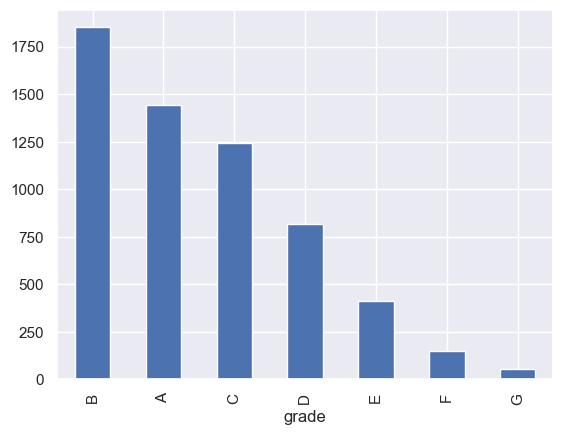

In [48]:
# Test set loan grade distribution
test_portfolio.grade.value_counts().plot.bar()

<Axes: xlabel='grade'>

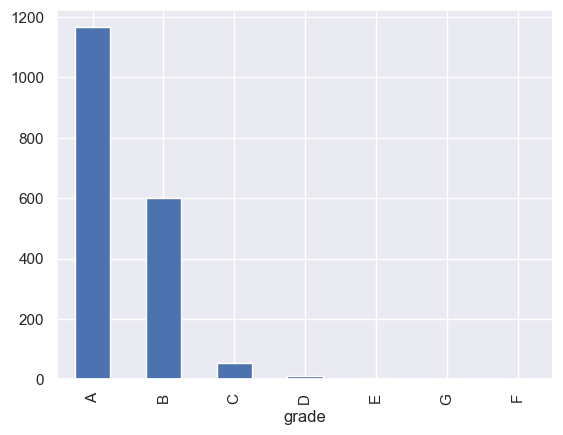

In [49]:
# Portfolio loan grade distribution
portfolio.grade.value_counts().plot.bar()

<Axes: xlabel='loan_term_year'>

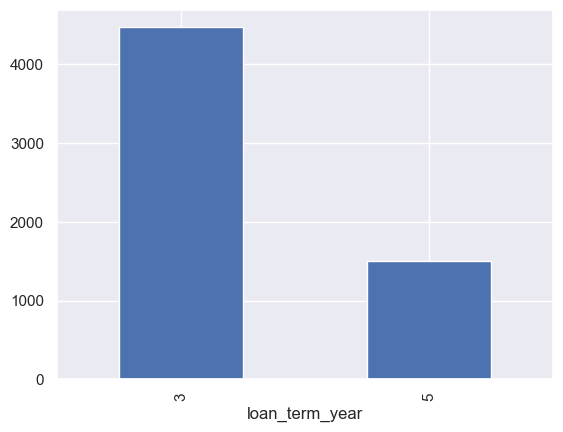

In [50]:
# Test set loan term distribution
test_portfolio.loan_term_year.value_counts().plot.bar()

<Axes: xlabel='loan_term_year'>

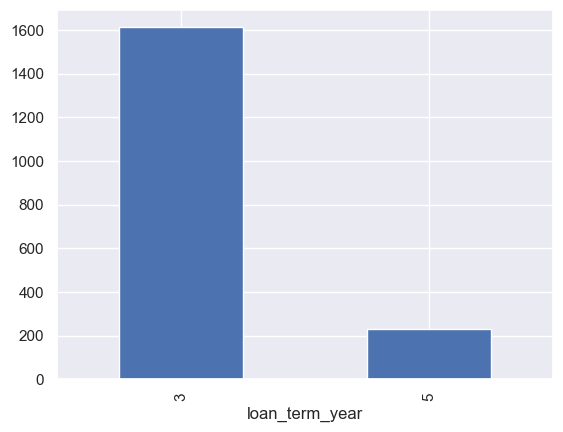

In [51]:
# Portfolio loan term distribution
portfolio.loan_term_year.value_counts().plot.bar()

In [52]:
# Average interest rate of the test set and portfolio
test_portfolio.int_rate.mean(), portfolio.int_rate.mean()

(12.061235560020092, 8.57527943570266)

## Requirment 9. Improving Portfolio
- **Balance loan distribution** across various loan grades and terms by eliminating certain features from the dataset.
- **Re-train the model** with newly selected features.
- **Re-evaluate the model**.
- **Create portfolio** with the help of the newly trained model.
- **Evaluate the new portfolio**.

In [53]:
df.columns

Index(['loan_amnt', 'loan_term_year', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose',
       'addr_state', 'dti', 'total_acc'],
      dtype='object')

In [54]:
df2 = df.drop(columns=['loan_term_year', 'int_rate', 'grade'])
df2.head()

,loan_amnt,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,total_acc
0,2400,10+ years,RENT,12252.0,Not Verified,small_business,IL,8.72,10.0
1,10000,10+ years,RENT,49200.0,Source Verified,other,CA,20.00,37.0
2,3000,9 years,RENT,48000.0,Source Verified,car,CA,5.35,4.0
3,5600,4 years,OWN,40000.0,Source Verified,small_business,CA,5.55,13.0
4,5375,< 1 year,RENT,15000.0,Verified,other,TX,18.08,3.0


In [55]:
df2_with_dummies = pd.get_dummies(df2, columns=['emp_length', 'home_ownership', 'verification_status', 'purpose', 'addr_state' ], drop_first=True)
data = df2_with_dummies
label = loan_df.repaid
d_train, d_test, l_train, l_test = train_test_split(data, label, test_size=0.3, random_state=23)

In [56]:
model = LogisticRegression(class_weight={0:0.9, 1:0.1})
#model = LogisticRegression(class_weight='balanced')
model.fit(d_train, l_train)

# Predict on the test set
l_pred = model.predict(d_test)

# Evaluate the model
accuracy = accuracy_score(l_test, l_pred)
print(accuracy)
class_report = classification_report(l_test, l_pred)
print(class_report)

0.23924326134270885
              precision    recall  f1-score   support

           0       0.16      0.93      0.27       894
           1       0.91      0.12      0.21      5079

    accuracy                           0.24      5973
   macro avg       0.53      0.53      0.24      5973
weighted avg       0.80      0.24      0.22      5973



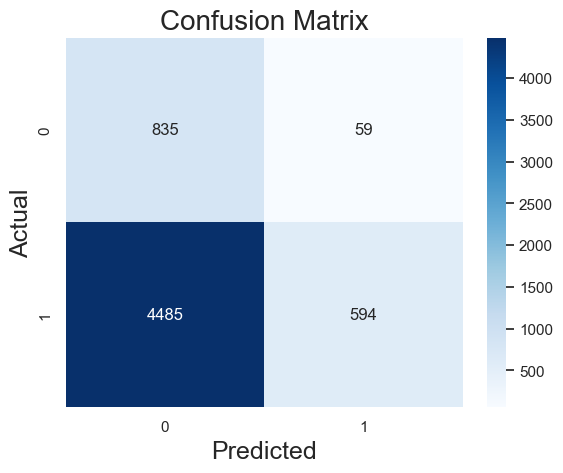

In [57]:
confusion_matrix(l_test, l_pred, [0, 1])

In [58]:
test_portfolio = loan_df.loc[d_test.index]
test_portfolio.head()

,loan_amnt,loan_term_year,grade,int_rate,purpose,annual_inc,emp_length,verification_status,home_ownership,addr_state,dti,total_acc,total_pymnt,recoveries,collection_recovery_fee,loan_status,repaid,annual_return
13202,15000,5,C,13.98,debt_consolidation,125000.0,10+ years,Not Verified,MORTGAGE,NJ,15.35,44.0,20932.049347,0.0,0.0,Fully Paid,1,0.226096
3985,26500,5,B,10.59,debt_consolidation,81000.0,10+ years,Verified,MORTGAGE,TX,11.19,16.0,22271.449979,0.0,0.0,Fully Paid,1,0.171757
8230,7000,3,A,7.29,other,150000.0,5 years,Not Verified,MORTGAGE,NY,19.54,29.0,7622.612042,0.0,0.0,Fully Paid,1,0.115668
6112,7000,3,A,5.99,debt_consolidation,35000.0,9 years,Not Verified,RENT,TX,10.80,28.0,7508.402271,0.0,0.0,Fully Paid,1,0.103020
12496,2000,3,C,13.23,other,24702.0,10+ years,Not Verified,RENT,IL,15.06,6.0,2434.304765,0.0,0.0,Fully Paid,1,0.207292


In [59]:
portfolio2 = test_portfolio[l_pred==1]
portfolio2.head()

,loan_amnt,loan_term_year,grade,int_rate,purpose,annual_inc,emp_length,verification_status,home_ownership,addr_state,dti,total_acc,total_pymnt,recoveries,collection_recovery_fee,loan_status,repaid,annual_return
8230,7000,3,A,7.29,other,150000.0,5 years,Not Verified,MORTGAGE,NY,19.54,29.0,7622.612042,0.00,0.0,Fully Paid,1,0.115668
9933,4800,5,B,10.74,medical,61000.0,4 years,Not Verified,OWN,NJ,14.28,43.0,830.000000,0.48,0.0,Charged Off,0,-0.983985
11966,12000,5,B,8.88,medical,82000.0,10+ years,Not Verified,MORTGAGE,CA,2.59,63.0,12348.101170,0.00,0.0,Fully Paid,1,0.066656
19274,1500,3,A,8.32,home_improvement,52000.0,10+ years,Not Verified,MORTGAGE,NY,12.39,39.0,1700.132267,0.00,0.0,Fully Paid,1,0.143581
18348,6000,3,D,14.74,debt_consolidation,85000.0,1 year,Source Verified,MORTGAGE,NY,15.02,37.0,7083.519958,0.00,0.0,Fully Paid,1,0.186525


In [60]:
portfolio2.annual_return.mean(), portfolio2.annual_return.std()

(0.10729688794460528, 0.19131171313366813)

In [61]:
portfolio.int_rate.mean(), portfolio2.int_rate.mean()

(8.57527943570266, 10.802572741194487)

<Axes: xlabel='grade'>

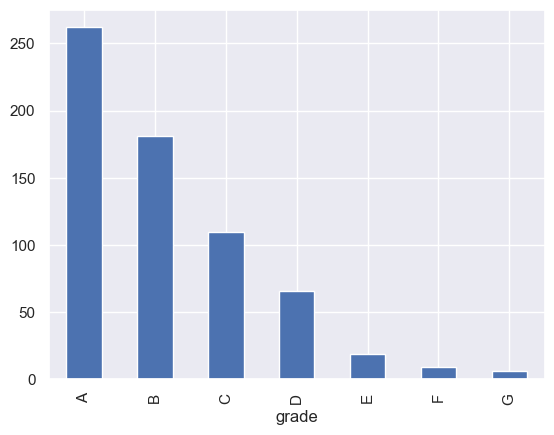

In [62]:
portfolio2.grade.value_counts().plot.bar()

<Axes: xlabel='loan_term_year'>

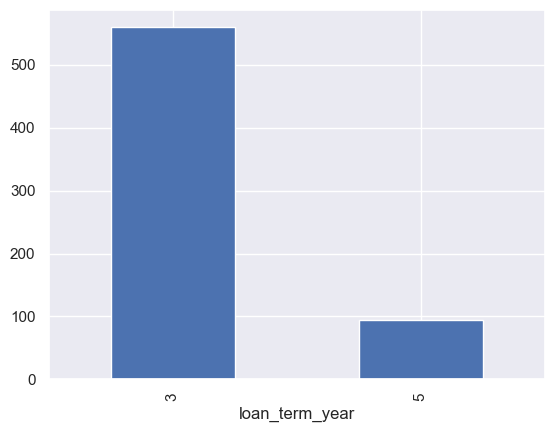

In [63]:
portfolio2.loan_term_year.value_counts().plot.bar()

In [64]:
from scipy.stats import ttest_ind
ttest_ind(portfolio2.annual_return, test_portfolio.annual_return)

TtestResult(statistic=3.213187129109025, pvalue=0.0013189932290497723, df=6624.0)

In [65]:
ttest_ind(portfolio2.annual_return, test_portfolio.annual_return)

TtestResult(statistic=3.213187129109025, pvalue=0.0013189932290497723, df=6624.0)

## Optional Analysis 1: Label Encoding with Logistic Regression

In [66]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

df3 = df.drop(columns=['int_rate', 'grade', 'loan_term_year'])

# Ordinal encode emp_length
mapping_dict = {
 '< 1 year':0,
 '1 year':1,
 '2 years':2,
 '3 years':3,
 '4 years':4,
 '5 years':5,
 '6 years':6,
 '7 years':7,
 '8 years':8,
 '9 years':9,
 '10+ years':10}
df3.emp_length = df.emp_length.map(mapping_dict)

# Apply LabelEncoder to each categorical feature
df3.home_ownership = label_encoder.fit_transform(df['home_ownership'])
df3.verification_status = label_encoder.fit_transform(df['verification_status'])
df3.purpose = label_encoder.fit_transform(df['purpose'])
df3.addr_state = label_encoder.fit_transform(df['addr_state'])

data = df3
label = loan_df.repaid
d_train, d_test, l_train, l_test = train_test_split(data, label, test_size=0.3, random_state=23)

model = LogisticRegression(class_weight={0:0.9, 1:0.1})
model.fit(d_train, l_train)

# Predict on the test set
l_pred = model.predict(d_test)

# Evaluate the model
accuracy = accuracy_score(l_test, l_pred)
print(accuracy)
class_report = classification_report(l_test, l_pred)
print(class_report)

test_portfolio = loan_df.loc[d_test.index]
portfolio3 = test_portfolio[l_pred==1]
portfolio3.annual_return.mean(), portfolio3.annual_return.std()

0.24543780344885316
              precision    recall  f1-score   support

           0       0.16      0.95      0.27       894
           1       0.93      0.12      0.22      5079

    accuracy                           0.25      5973
   macro avg       0.54      0.53      0.24      5973
weighted avg       0.81      0.25      0.22      5973



(0.113912613542809, 0.18331135361400114)

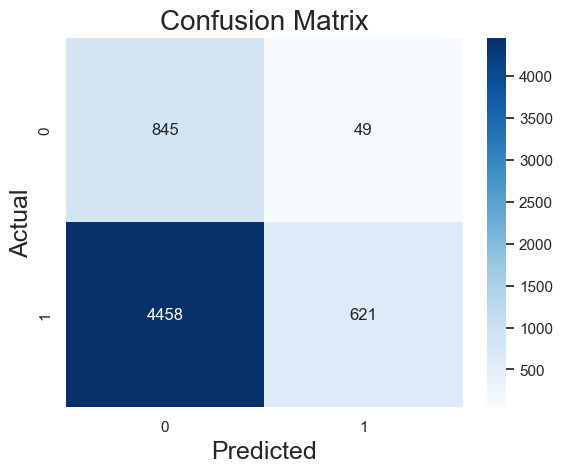

In [67]:
confusion_matrix(l_test, l_pred, [0, 1])

## Optional Analysis 2: RandomForest Model

- Label encode categorical features
- Set max_depht to 5 to reduce overfitting


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

df4 = df.drop(columns=['int_rate', 'grade', 'loan_term_year'])
# Ordinal encode emp_length
mapping_dict = {
 '< 1 year':0,
 '1 year':1,
 '2 years':2,
 '3 years':3,
 '4 years':4,
 '5 years':5,
 '6 years':6,
 '7 years':7,
 '8 years':8,
 '9 years':9,
 '10+ years':10}
df4.emp_length = df.emp_length.map(mapping_dict)

# Apply LabelEncoder to each categorical feature
df4.grade = label_encoder.fit_transform(df['grade'])
df4.home_ownership = label_encoder.fit_transform(df['home_ownership'])
df4.verification_status = label_encoder.fit_transform(df['verification_status'])
df4.purpose = label_encoder.fit_transform(df['purpose'])
df4.addr_state = label_encoder.fit_transform(df['addr_state'])

data = df4
label = loan_df.repaid
d_train, d_test, l_train, l_test = train_test_split(data, label, test_size=0.3, random_state=23)

rf_model = RandomForestClassifier(max_depth=5, class_weight={0:0.9, 1:0.1})
rf_model.fit(d_train, l_train)

# Predict on the test set
l_pred = rf_model.predict(d_test)

# Evaluate the model
accuracy = accuracy_score(l_test, l_pred)
print(accuracy)
class_report = classification_report(l_test, l_pred)
print(class_report)

test_portfolio = loan_df.loc[d_test.index]
portfolio4 = test_portfolio[l_pred==1]
print(test_portfolio.annual_return.mean(), test_portfolio.annual_return.std())
portfolio4.annual_return.mean(), portfolio4.annual_return.std()

0.27540599363803786
              precision    recall  f1-score   support

           0       0.16      0.94      0.28       894
           1       0.94      0.16      0.27      5079

    accuracy                           0.28      5973
   macro avg       0.55      0.55      0.28      5973
weighted avg       0.82      0.28      0.27      5973

0.07012260795090526 0.28878256575041106


(0.12157073130207117, 0.17953817586625914)

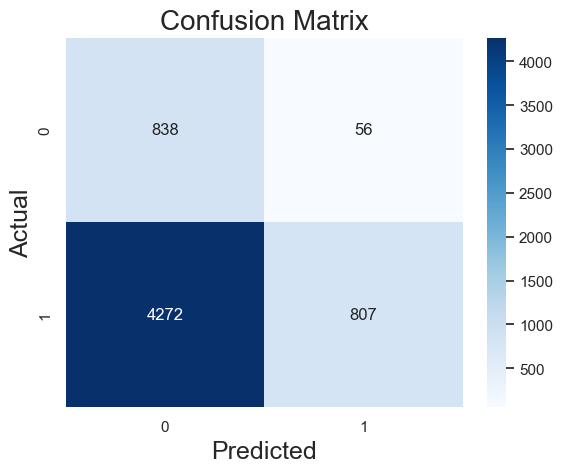

In [69]:
confusion_matrix(l_test, l_pred, [0, 1])

In [70]:
portfolio4.int_rate.mean()

11.078841251448436

<Axes: xlabel='grade'>

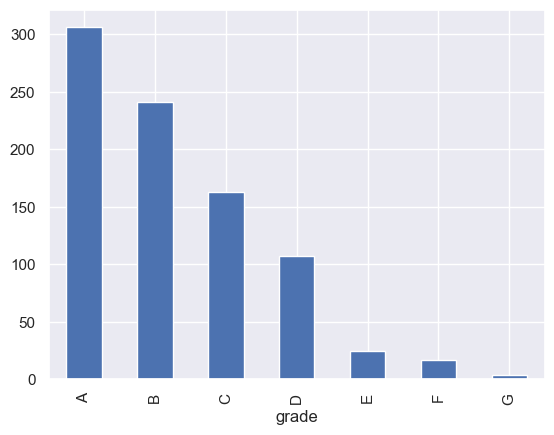

In [71]:
portfolio4.grade.value_counts().plot.bar()

<Axes: xlabel='loan_term_year'>

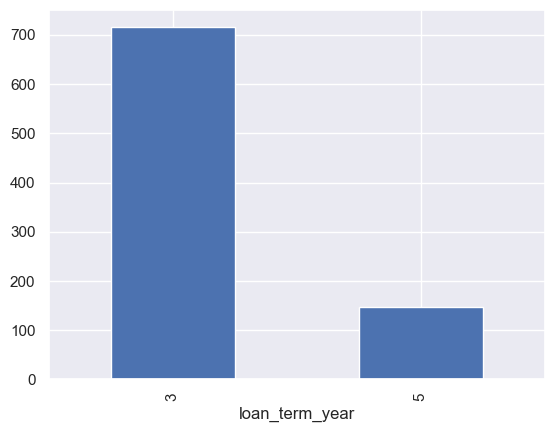

In [72]:
portfolio4.loan_term_year.value_counts().plot.bar()